In [ ]:

#Ibo Dataset
!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/train.tsv
!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/test.tsv


#Hausa Dataset
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/hau/train.tsv
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/hau/test.tsv


# #Nigerian Pidgin dataset
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/pcm/train.tsv
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/pcm/test.tsv



!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2
import tensorflow as tf
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import LSTM


from random import randint
#data_frame_ibo = pd.read_tsv("train.tsv", sep="\t", error_bad_lines=False)

import csv



--2023-04-12 22:41:21--  https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/train.tsv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train.tsv.20’

train.tsv.20            [   <=>              ]   3.79M  7.80MB/s    in 0.5s    

2023-04-12 22:41:22 (7.80 MB/s) - ‘train.tsv.20’ saved [3980219]

--2023-04-12 22:41:22--  https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/test.tsv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test.tsv’

test.tsv                [  <=>               ]   1.05M  2.85MB/s    in 0.4s    

2023-04-12 22:41:23 (2.85 MB/s) - ‘test.tsv’ saved [1096999]



PRE-CELANING CULTURE:
Setting up libraries and function for process unclean data into clean data

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize text into words
    words = word_tokenize(text)
    
    # Remove stop words
    # stop_words = set(stopwords.words('english'))
    # words = [w for w in words if not w in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Convert list of words back to string
    text = " ".join(words)
    
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


THE CLEANING PROCESS

In [ ]:
def clean(filename):
  data = []
  emotion = []
  with open(filename, 'r') as f:
      reader = csv.reader(f, delimiter='\t')
      for row in reader:
          soup = BeautifulSoup(str(row), 'html.parser')
          text = soup.text

          #Cleaning the data
          text = preprocess_text(text)

          if len(text.split(" ")) > 1:  #usernames are skipped
            emo = text[text.rindex(" ")+1:] #identifying the emotion since it is the last word at the end of every sentence
            
            if emo  == 'negative' or emo == 'positive' or emo == 'neutral': #filtering chuff [e.g words about the website which has noting to do with the conversation]
              data.append(text[:text.rindex(" ")])
              emotion.append(emo)
  return data, emotion

In [ ]:
data_r = []
emotion = []


data_r, emotion = clean("train.tsv")

emotion_sequence = []
for each_emotion in emotion:
  if each_emotion == 'negative':
    emotion_sequence.append(-1)
  if each_emotion == 'neutral':
    emotion_sequence.append(0)
  if each_emotion == 'positive':
    emotion_sequence.append(1)

#if validation is not part of train uncomment
# val_data, val_emotion = clean("dev.tsv")


<ipython-input-238-774c3e0b630c>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(str(row), 'html.parser')


CLEANED DATA SAMPLE

In [ ]:
data_r

['nna ike gwuru ooo 😂 httpstconds7jufbgd',
 'user chineke nna kezi mgbe ole',
 'lol isi adirokwanu gi nma 😐😒😒😒 httpstco5gzmgyk6rw',
 'user haha fulani herdsman akpa amu gi retweet rie nsi 😝',
 'nna ghetto di gi na aru biko httpstco4g9bzi4ukg',
 'user ezigbo onye iberibe',
 'thief ole barawo onye oshi httpstcopzg1ohdp5v',
 'chukwu nna afam ị gaghị egbu mmadụ na app a httpstcosjaivdtwyp',
 'user or ma agbalie gi elu🙄',
 'user o dikwa egwu😂😂😂😂',
 'user lmao awka na ebi ajo ndu',
 'user nna ehh ụfọdụ ụmụ nwoke dara iberibe 🤦🏽u200d♂️',
 'user rapụ ndị nzuzu',
 'taa nnaa gaa zuru ike httpstcoizwxsftoc0',
 'nobody ugly oooo obu ego na akpari mmadu httpstcogdsquyjzkf',
 'user user user user user user user user user user user rijuo nsi onu dia nkea abuluzia gini alako kwana muna chairmo ooh before kitikpa agbasa gi isi',
 'negodu mama mmadu 🤦u200d♂️ httpstcogl9wfqqclz',
 'user user user nsogbu dị kwa ife corona na cause 😩😩',
 'user zuzuru getaway from here onye nkogheri',
 'user user 🤣 🤣 🤣 agwọ

DATA FRAMING

In [ ]:
data = pd.DataFrame({
    "text": data_r,
    "emotion": emotion
})

data

,text,emotion
0,nna ike gwuru ooo 😂 httpstconds7jufbgd,negative
1,user chineke nna kezi mgbe ole,negative
2,lol isi adirokwanu gi nma 😐😒😒😒 httpstco5gzmgyk6rw,negative
3,user haha fulani herdsman akpa amu gi retweet rie nsi 😝,negative
4,nna ghetto di gi na aru biko httpstco4g9bzi4ukg,negative
...,...,...
10187,e mana mu na chineke aman nke wa🙏,positive
10188,oga jide daalu oo ezigbo mmadu httpstcohnhjrpwomi,positive
10189,celebration continue chukwu okike ekele m gi httpstcojbs3euiy9b,positive
10190,nwayi oma am ready 4 2nite user africalagos httpstcomp8jgszahi,positive


CONVERTING DATASET INTO NUMPY ARRAYS

In [ ]:
data = np.array(data[["text","emotion"]])


In [ ]:
data

array([['nna ike gwuru ooo 😂 httpstconds7jufbgd', 'negative'],
       ['user chineke nna kezi mgbe ole', 'negative'],
       ['lol isi adirokwanu gi nma 😐😒😒😒 httpstco5gzmgyk6rw', 'negative'],
       ...,
       ['celebration continue chukwu okike ekele m gi httpstcojbs3euiy9b', 'positive'],
       ['nwayi oma am ready 4 2nite user africalagos httpstcomp8jgszahi', 'positive'],
       ['user user user jisie ike imela kpa ole', 'positive']], dtype=object)

SETTING HYPER-PARAMETERS

In [ ]:
VOCAB_SIZE = 1024
BATCH_SIZE = 32
LEARNING_RATE = 0.01
EPOCH = 10
EMBEDDED_DIMENSION = 16
HIDDEN_LAYER = 10



SEPARATING TRAIN FROM VALIDATION

In [ ]:
train_data = []
train_emotion = []

val_data = []
val_emotion = []

selected = []
for i in range(int(len(data_r)*0.2)):
  selected.append(randint(0,len(data_r)))

for j in range(len(data_r)):
  if j in selected:
    val_data.append(data_r[j])
    val_emotion.append(emotion_sequence[j])
  else:
    train_data.append(data_r[j])
    train_emotion.append(emotion_sequence[j])

print("Training size:",len(train_data))
print("Validation size:",len(val_data))
print(len(data_r))

Training size: 8330
Validation size: 1862
10192


TOKENIZATION, SEQUENCING AND EMBEDDING OF TEXTS

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)

# independent_words = tokenizer.word_index

train_text_sequences = tokenizer.texts_to_sequences(train_data)
padded_train_data = pad_sequences(train_text_sequences, maxlen=100, padding='post', truncating='post')

val_text_sequences = tokenizer.texts_to_sequences(val_data)
padded_val_data = pad_sequences(val_text_sequences, maxlen=100, padding='post', truncating='post')


# padded_train_data = Tensor([train_text_sequences])

# padded_train_data

In [ ]:
train_text_sequences

[[30, 22, 150, 168, 49, 1],
 [2, 54, 30, 1, 74, 263],
 [135, 39, 1, 4, 89, 1, 1],
 [30, 1, 11, 4, 3, 194, 26, 1],
 [2, 45, 5, 268],
 [1, 263, 1, 5, 724, 1],
 [16, 30, 562, 92, 900, 244, 97, 3, 901, 9, 1],
 [2, 408, 28, 1, 4, 1],
 [2, 12, 287, 1],
 [2, 257, 453, 3, 725, 688, 79],
 [2, 30, 517, 834, 133, 51, 1, 268, 1],
 [2, 1, 34, 269],
 [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  288,
  58,
  227,
  164,
  1,
  195,
  1,
  1,
  902,
  1,
  307,
  409,
  432,
  1,
  4,
  39],
 [385, 396, 40, 1, 1],
 [2, 2, 2, 68, 46, 43, 42, 1, 3, 1, 1],
 [2, 1, 1, 334, 234, 5, 1],
 [2, 2, 98, 98, 98, 1, 1, 5, 75, 23, 900, 1, 1],
 [2, 2, 1, 1, 58, 4, 60, 235, 1, 17, 9],
 [2, 2, 1, 14, 11, 582, 3, 47, 1, 1, 7, 39],
 [2, 12, 419, 13, 136, 3, 1, 117, 7, 25, 3, 194],
 [2, 2, 49, 49, 7, 517, 8, 648, 21],
 [14, 3, 1, 10, 269, 58, 1],
 [2, 2, 269, 7, 11, 1, 1],
 [2, 1, 835, 36, 270, 151, 245, 90, 118],
 [2, 2, 92, 3, 1, 1, 169, 503, 252],
 [2, 2, 26, 1, 15, 40, 334, 1, 1],
 [2, 979, 836, 195, 

CONFIGURING THE MODEL

In [ ]:
neural = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDED_DIMENSION,input_length=100),

    tf.keras.layers.Bidirectional(LSTM(24)),

    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(LEARNING_RATE)),

    tf.keras.layers.Dense(3, activation='softmax')
])

neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
neural.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 100, 16)           16384     
                                                                 
 bidirectional_20 (Bidirecti  (None, 48)               7872      
 onal)                                                           
                                                                 
 dense_55 (Dense)            (None, 16)                784       
                                                                 
 dense_56 (Dense)            (None, 3)                 51        
                                                                 
Total params: 25,091
Trainable params: 25,091
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_emotion = tf.keras.utils.to_categorical(train_emotion, num_classes=3)
val_emotion = tf.keras.utils.to_categorical(val_emotion, num_classes=3)


In [ ]:
learned_outputs = neural.fit(
    padded_train_data.tolist(), train_emotion.tolist(), epochs=EPOCH, batch_size = BATCH_SIZE,
    validation_data=(padded_val_data.tolist(), val_emotion.tolist()),
    verbose=2
)

Epoch 1/10
261/261 - 45s - loss: 1.1006 - accuracy: 0.5012 - val_loss: 0.9197 - val_accuracy: 0.5961 - 45s/epoch - 171ms/step
Epoch 2/10
261/261 - 23s - loss: 0.8270 - accuracy: 0.6399 - val_loss: 0.8099 - val_accuracy: 0.6600 - 23s/epoch - 88ms/step
Epoch 3/10
261/261 - 20s - loss: 0.7373 - accuracy: 0.7017 - val_loss: 0.7754 - val_accuracy: 0.6837 - 20s/epoch - 75ms/step
Epoch 4/10
261/261 - 25s - loss: 0.6974 - accuracy: 0.7250 - val_loss: 0.7572 - val_accuracy: 0.6971 - 25s/epoch - 95ms/step
Epoch 5/10
261/261 - 20s - loss: 0.6576 - accuracy: 0.7499 - val_loss: 0.7046 - val_accuracy: 0.7234 - 20s/epoch - 76ms/step
Epoch 6/10
261/261 - 21s - loss: 0.5969 - accuracy: 0.7848 - val_loss: 0.6501 - val_accuracy: 0.7460 - 21s/epoch - 82ms/step
Epoch 7/10
261/261 - 20s - loss: 0.5534 - accuracy: 0.7984 - val_loss: 0.6621 - val_accuracy: 0.7519 - 20s/epoch - 78ms/step
Epoch 8/10
261/261 - 34s - loss: 0.5330 - accuracy: 0.8026 - val_loss: 0.6329 - val_accuracy: 0.7551 - 34s/epoch - 131ms/ste

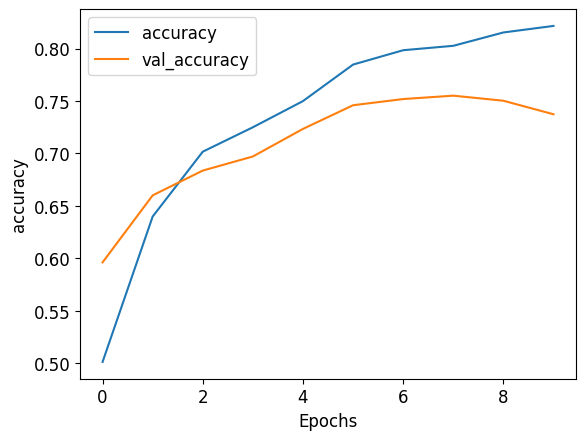

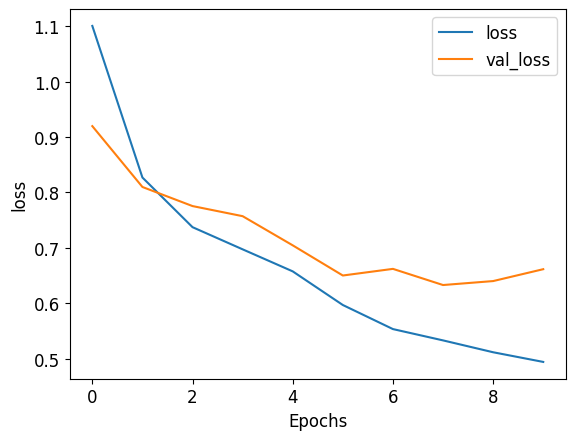

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(learned_outputs, "accuracy")
plot_graphs(learned_outputs, "loss")

TESTING

In [ ]:
def cleanTest(filename):
  data = []
  emotion = []
  tweet = False
  with open(filename, 'r') as f:
      reader = csv.reader(f, delimiter='\t')
      for row in reader:
          soup = BeautifulSoup(str(row), 'html.parser')
          text = soup.text
          
          ## Cleaning the data
          text = preprocess_text(text)
          if text == 'tweet':
            tweet = True
            continue

          if tweet:
            if len(text) == 0:
              continue

            if text  == 'negative' or text == 'positive' or text == 'neutral': #filtering chuff [e.g words about the website which has noting to do with the conversation]
              emotion.append(text)
            else:
              data.append(text)
          
          # if len(text.split(" ")) > 1:  #usernames are skipped
          #   emo = text[text.rindex(" ")+1:] #identifying the emotion since it is the last word at the end of every sentence
            
          #   if emo  == 'negative' or emo == 'positive' or emo == 'neutral': #filtering chuff [e.g words about the website which has noting to do with the conversation]
          #     data.append(text[:text.rindex(" ")])
          #     emotion.append(emo)
  return data, emotion

In [ ]:
data_t, emotion_t = cleanTest("test.tsv")


<ipython-input-287-b0bd0a314124>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(str(row), 'html.parser')


Streaming output truncated to the last 5000 lines.
gbuo gị ebe ahụ
----END----
---BEGIN---
negative
----END----
---BEGIN---
chukaaaaaaaa onye ala
----END----
---BEGIN---
negative
----END----
---BEGIN---
ebe ndi akwuna na ele dia content
----END----
---BEGIN---
negative
----END----
---BEGIN---
chukwu lakwaa gi niyi anumanu
----END----
---BEGIN---
negative
----END----
---BEGIN---
chai ndị mádu self
----END----
---BEGIN---
negative
----END----
---BEGIN---
this influencer thing agbawala ndi mmadu ara
----END----
---BEGIN---
negative
----END----
---BEGIN---
chineke kpokwaaaa gi oku oooo lekwa udi goal ijuusu rie ihe m makwa na mama nnukwum ga enye na agbakasiro ahu
----END----
---BEGIN---
negative
----END----
---BEGIN---
konkiri jukwa akpa gi ebeahu onye mmuo yi efe
----END----
---BEGIN---
negative
----END----
---BEGIN---
teacher afo nsi iji ihe ijighi ihe obula
----END----
---BEGIN---
negative
----END----
---BEGIN---
twitter for ndi ike uwa gwuru
----END----
---BEGIN---
negative
----END---

['label',
 'obodo à wu igwe',
 'nwanne chukwu gọzie gị ma nyekwa gị ogologo ndụ ahụ isike na obi añụrị',
 'i bu chimoooooooo i bu chim i bu chimoooooooo onye m ji eme onu ♫♫',
 'w ekele oma',
 'she say make i come drink gulder njideka jide ka iji nwanyi oma',
 'nwanyi di ok',
 'happy birthday ukwuchukwu olisa mebelu gi ife nnam',
 'ezigbo ego dị nime akpa',
 'nime ndum niile ebe nwere olilianya echi ga diri m mma ka obo',
 'posh ezigbo mmadu happy born day ozo chukwu kwalu na edo ni ne udo ogonogo ndu na agam niru nubochi ndu gi ni le',
 'maka o di mma umu nwanyi daalu rinne',
 'full voltage igbo ndi oma',
 'lord am saying nma nma nma jesus onye ebere',
 'ụtụtụ ọma federal capital territory nigeria',
 'okwu gi kwu oto ka utu nwatakiri',
 'egwu oma for with',
 'everybody dey wait puta kene nogbo ife di mma amaka better soup na money kill am o adanwa ngwa pekem pekem iya ada ada oyolima ada ada iyooo',
 'nwata kwọcha aka osoro ọgaranya rie nri',
 'otú a kà ọdị ezigbo mmadụ',
 'frank fran

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(data_t)

emotion_sequence = []
for each_emotion in emotion_t:
  if each_emotion == 'negative':
    emotion_sequence.append(-1)
  if each_emotion == 'neutral':
    emotion_sequence.append(0)
  if each_emotion == 'positive':
    emotion_sequence.append(1)

emotion_sequence = tf.keras.utils.to_categorical(emotion_sequence, num_classes=3)

# Evaluate the model on test data
test_loss, test_acc = neural.evaluate(data_t[:len(emotion_t)], emotion_sequence, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Make predictions on new data
predictions = neural.predict(new_data)

ValueError: ignored